In [1]:
from skimage import io, feature
from scipy.spatial.distance import euclidean
import statistics
import matplotlib.pyplot as plt

# Imported the preprocessed images(tif) from fiji and compute the peaks ans the distances

5.0


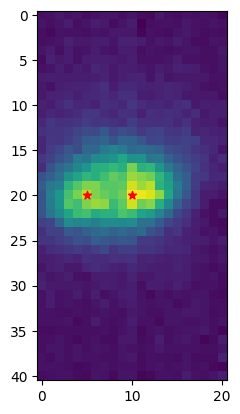

12.36931687685298


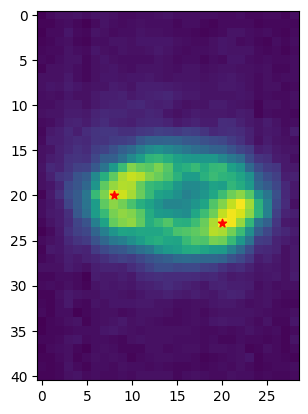

10.04987562112089


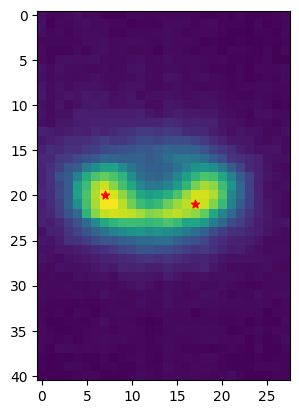

5.0990195135927845


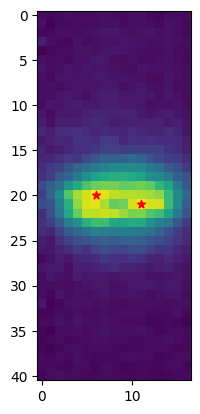

8.0


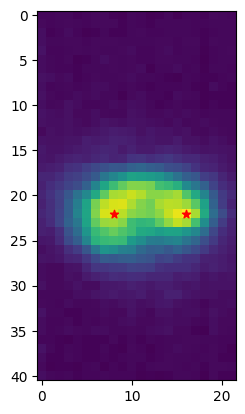

11.0


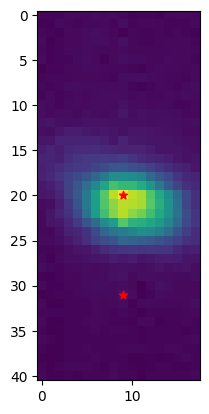

5.830951894845301


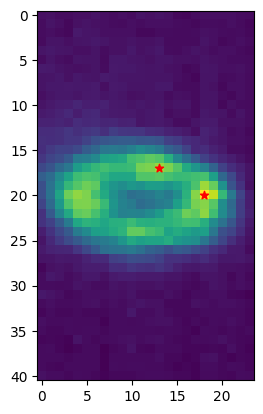

16.0


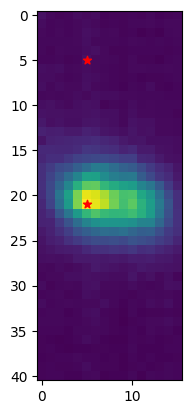

3.1622776601683795


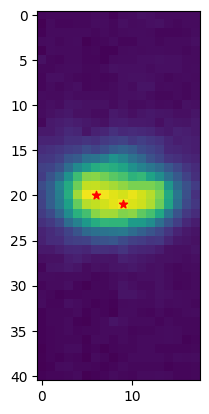

10.770329614269007


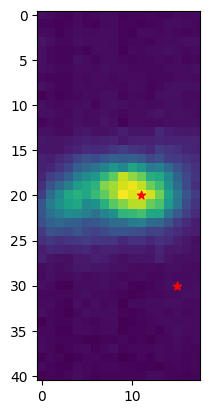

13.92838827718412


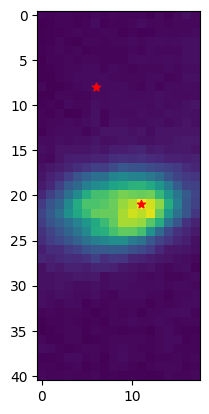

15.033296378372908


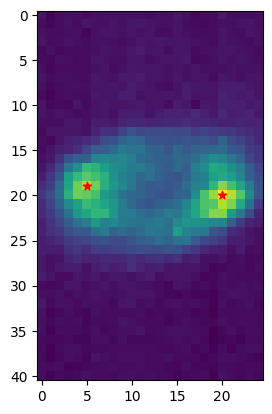

3.1622776601683795


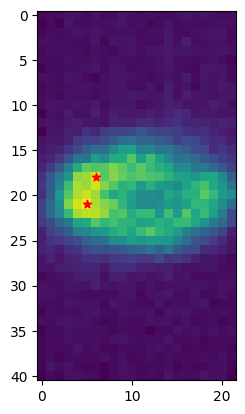

6.082762530298219


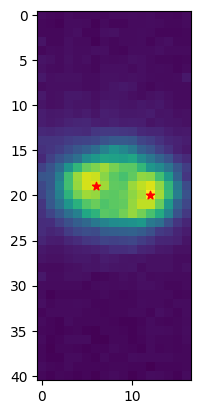

9.055385138137417


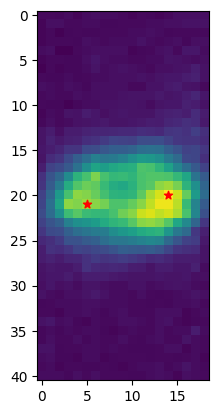

15.132745950421556


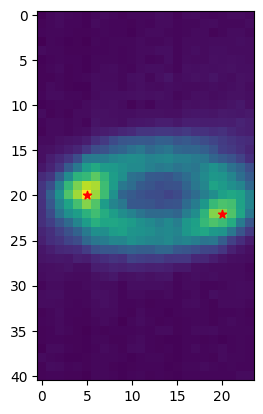

17.029386365926403


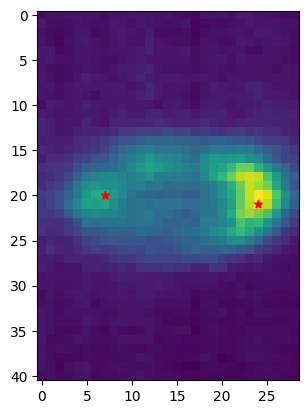

17.0


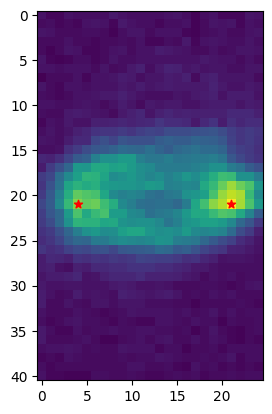

11.0


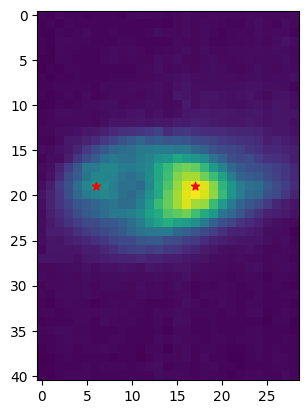

14.035668847618199


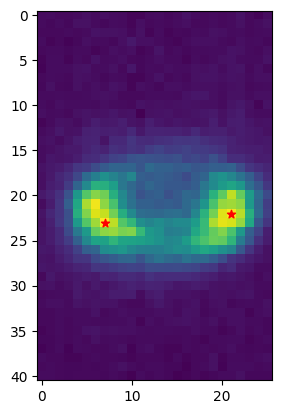

4.0


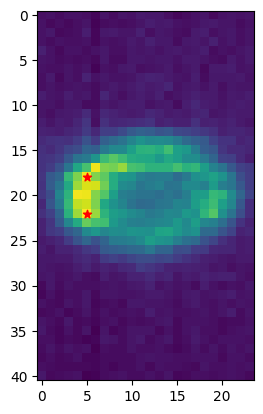

10.198039027185569


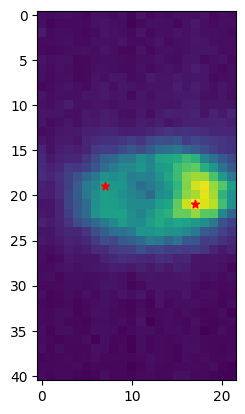

3.1622776601683795


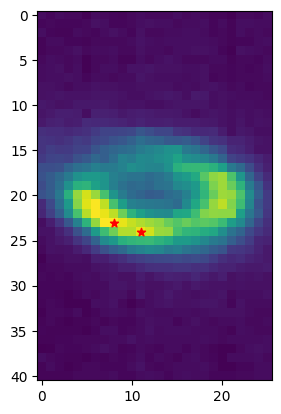

16.1245154965971


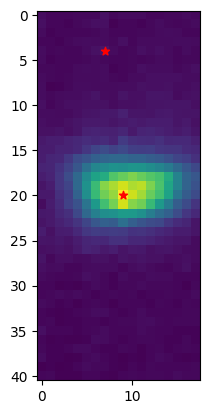

8.246211251235321


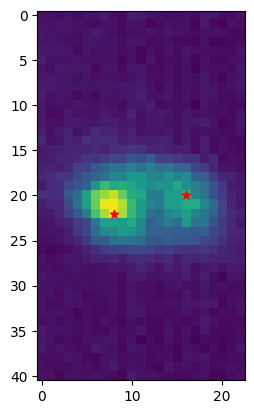

9.055385138137417


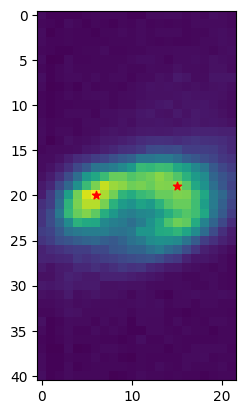

9.486832980505138


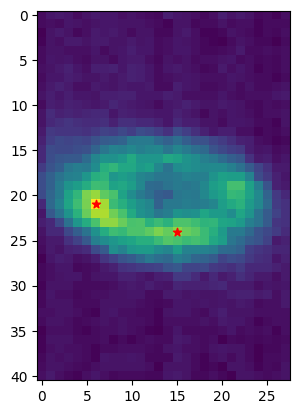

10.198039027185569


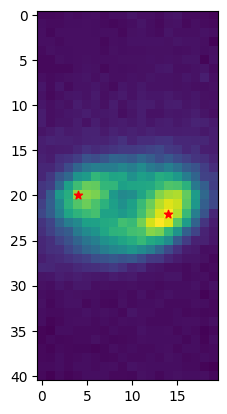

11.180339887498949


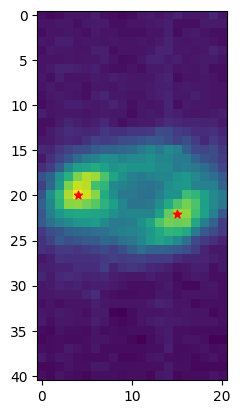

12.041594578792296


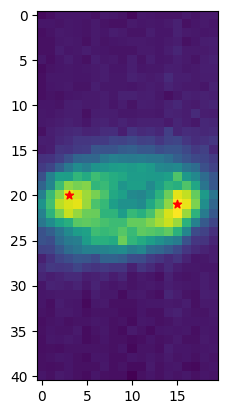

4.47213595499958


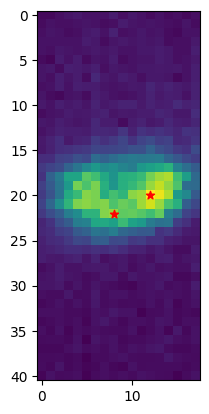

13.152946437965905


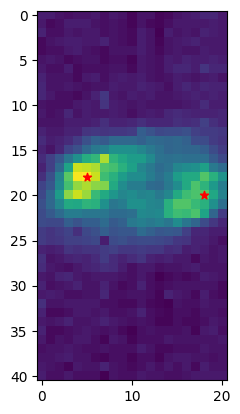

17.0


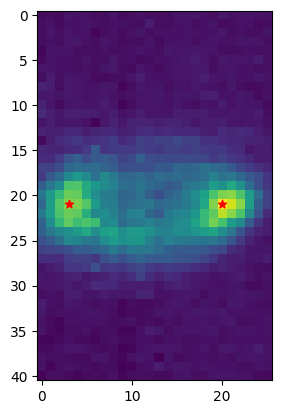

14.142135623730951


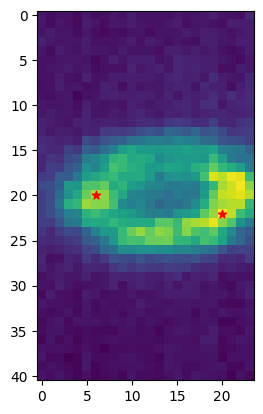

8.246211251235321


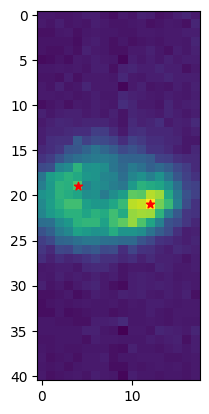

13.038404810405298


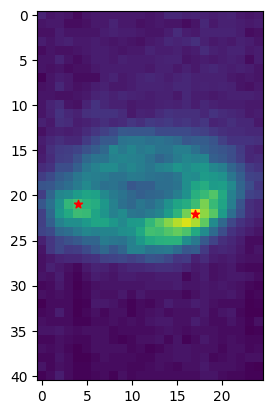

16.0


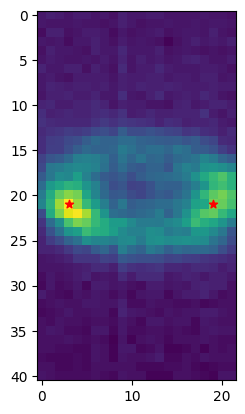

16.0


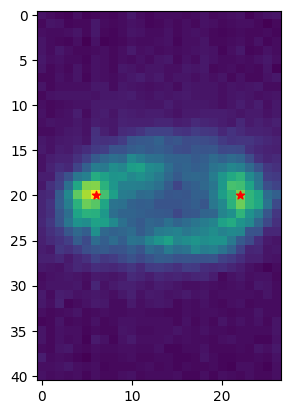

16.0312195418814


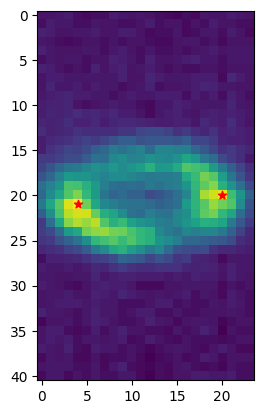

10.0


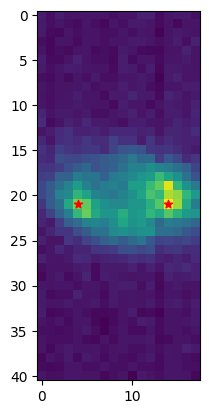

In [2]:
distance = []
# Read through all of my images with FtsZ-rings
for i in range (40):
    filename = "data\\Roi-" + str(i) + ".tif"

    # Import the image
    image = io.imread(filename)

    # Find the high intensity peaks, minimum pixel distance = 2, find 2 top peaks based on intensity and not really close together
    peak = feature.peak_local_max(image, min_distance=2, num_peaks = 2, exclude_border=True)

    # Compute euclidean distance (put them into a list) between peaks and put a threshold based on the wrong spotted to minimise their impact
    print(euclidean(peak[0], peak[1]))
    if (euclidean(peak[0], peak[1]) < 17):
        distance.append(euclidean(peak[0], peak[1]))

    ## Plot the rings and the peaks
    plt.imshow(image)
    plt.scatter(peak[:, 1], peak[:, 0], marker='*', color='red')
    plt.show()
#io.imshow(image)

# Standard deviation and mean of the distances between the cells

In [3]:
# Calculate standard deviation and mean
std_peaks = statistics.stdev(distance)
mean_peaks = statistics.mean(distance)
print("Standard Deviation of FtsZ-rings diameter:", std_peaks)
print("Mean Distance of FtsZ-rings diameter:", mean_peaks)

Standard Deviation of FtsZ-rings diameter: 4.12914766771235
Mean Distance of FtsZ-rings diameter: 10.256448233258766


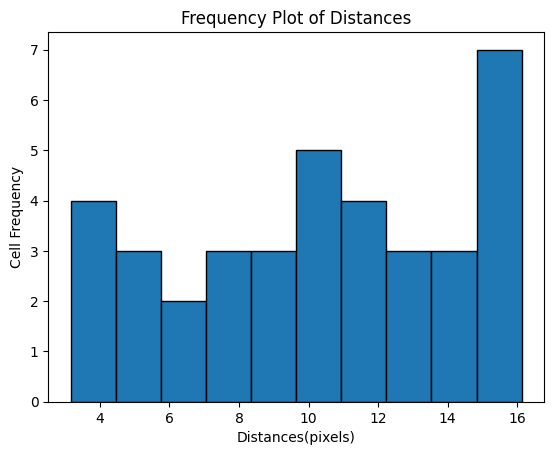

In [4]:
import pandas as pd
df = pd.DataFrame(distance)

# Create a histogram based on the frequency of the calculated distances
plt.hist(distance, bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Distances(pixels)')
plt.ylabel('Cell Frequency')
plt.title('Frequency Plot of Distances')

# Display
plt.show()